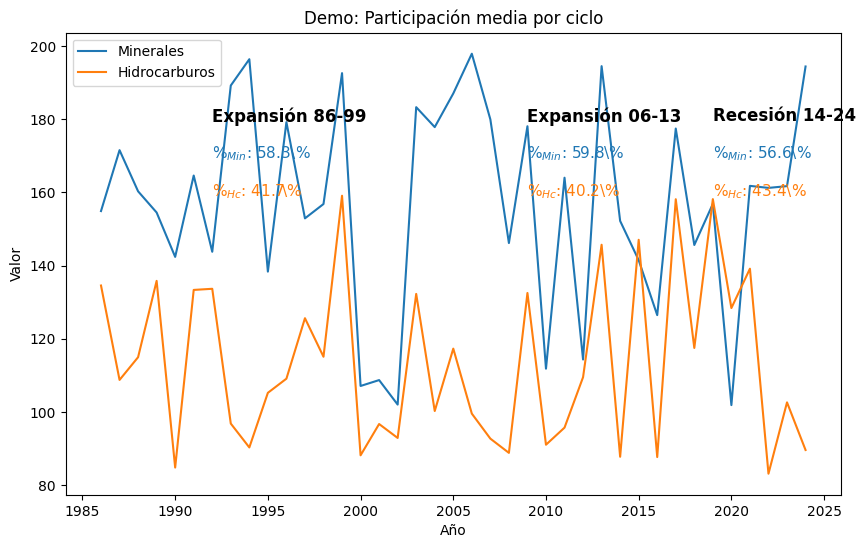

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir la función según lo especificado
def add_participation_cycle_boxes(
    ax,
    df: pd.DataFrame,
    periods: dict[str, slice],
    components: list[str],
    total_col: str,
    offsets: dict[str, tuple[float, float]],
    abbr_map: dict[str, str] | None = None,
    colors: dict[str, str] | None = None,
    *,
    header_kwargs: dict | None = None,
    text_kwargs: dict | None = None,
    line_spacing_ratio: float = 0.05,
):
    abbr_map     = abbr_map or {c: c for c in components}
    colors       = colors   or {c: ax.get_lines()[0].get_color() for c in components}
    header_kwargs= header_kwargs or {
        'ha':'left','va':'top','fontsize':12,'fontweight':'bold','color':'black','zorder':7
    }
    text_kwargs  = text_kwargs   or {
        'ha':'left','va':'top','fontsize':11,'zorder':7
    }

    y_max        = ax.get_ylim()[1]
    line_spacing = y_max * line_spacing_ratio

    for ciclo, period in periods.items():
        df_period = df.loc[period, components + [total_col]].dropna()
        pct = df_period[components].div(df_period[total_col], axis=0) * 100
        medias_pct = pct.mean()

        x0, y_frac = offsets.get(ciclo, (df.index[0], 0.8))
        y0 = y_max * y_frac

        ax.text(x0, y0, ciclo, **header_kwargs)
        for i, comp in enumerate(components):
            pct_med = medias_pct[comp]
            y = y0 - (i+1)*line_spacing
            txt = fr"$\%_{{{abbr_map.get(comp,comp)}}}$: {pct_med:.1f}\%"
            kw = text_kwargs.copy()
            kw['color'] = colors.get(comp, kw.get('color'))
            ax.text(x0, y, txt, **kw)

# Crear DataFrame de ejemplo para años 1986-2024
years = list(range(1986, 2025))
np.random.seed(0)
minerales = np.random.uniform(100, 200, len(years))
hidrocarburos = np.random.uniform(80, 160, len(years))
df = pd.DataFrame({
    'año': years,
    'minerales': minerales,
    'hidrocarburos': hidrocarburos,
})
df.set_index('año', inplace=True)
df['total'] = df['minerales'] + df['hidrocarburos']

# Definir periodos y offsets
periods = {
    "Expansión 86-99": slice(1986, 1999),
    "Expansión 06-13": slice(2006, 2013),
    "Recesión 14-24":  slice(2014, 2024),
}
offsets = {
    "Expansión 86-99": (1992, 0.9),
    "Expansión 06-13": (2009, 0.9),
    "Recesión 14-24":  (2019, 0.9),
}
abbr_map = {'minerales':'Min','hidrocarburos':'Hc'}
colors = {'minerales':'#1f77b4','hidrocarburos':'#ff7f0e'}

# Graficar y aplicar la función
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['minerales'], label='Minerales', color=colors['minerales'])
ax.plot(df.index, df['hidrocarburos'], label='Hidrocarburos', color=colors['hidrocarburos'])
ax.legend()

add_participation_cycle_boxes(
    ax, df, periods,
    components=['minerales','hidrocarburos'],
    total_col='total',
    offsets=offsets,
    abbr_map=abbr_map,
    colors=colors
)

ax.set_title("Demo: Participación media por ciclo")
ax.set_xlabel("Año")
ax.set_ylabel("Valor")
plt.show()
